In [2]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 22.8 MB/s eta 0:00:00


In [35]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta

In [4]:
#Input data
df1 = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/saved_data.csv")

df1

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,2023-04-16,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1.866594e+06,495223185.0,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,9023.50,4137.64,33885.31,28493.47
1,2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1.839875e+06,631025193.0,...,2090.59,96.66,0.088890,0.51930,2002.2,25.460,9023.50,4137.64,33885.31,28493.47
2,2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1.759535e+06,559166432.0,...,2099.98,96.34,0.088707,0.52269,2002.2,25.460,9023.50,4137.64,33885.31,28493.47
3,2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1.812113e+06,567094231.0,...,2012.11,94.19,0.087344,0.51244,2041.3,25.925,9058.50,4146.22,34030.34,28156.97
4,2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1.933496e+06,635037442.0,...,1916.58,92.02,0.083398,0.50473,2010.9,25.458,8916.50,4091.95,33647.22,28082.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,2010-07-24,0.1,0.1,0.1,0.1,0.50,959.0,1.820000e+02,1.519540e+03,1148772.0,...,0.00,0.00,0.000000,0.00000,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4650,2010-07-23,0.1,0.1,0.1,0.1,2.40,655.0,1.820000e+02,5.309330e+02,412004.0,...,0.00,0.00,0.000000,0.00000,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4651,2010-07-22,0.1,0.1,0.1,0.1,2.16,594.0,1.820000e+02,5.724432e+02,403000.0,...,0.00,0.00,0.000000,0.00000,1195.6,18.120,7002.75,1093.67,10322.30,9220.88
4652,2010-07-21,0.1,0.1,0.1,0.1,0.58,784.0,1.820000e+02,6.038213e+02,499964.0,...,0.00,0.00,0.000000,0.00000,1191.8,17.803,0.00,1069.59,10120.53,9278.83


In [5]:
df2=df1[0:1000]
df = df2.iloc[::-1]
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
999,2020-07-21,9387.3,9162.3,9426.9,9155.1,458.99,927506.0,1.734590e+13,1292411.712,491378058.0,...,245.53,43.785,0.003300,0.19947,1843.9,21.557,6534.5,3257.30,26840.40,22884.22
998,2020-07-22,9513.7,9387.4,9523.1,9296.0,386.00,1017627.0,1.734590e+13,1260827.708,571307064.0,...,263.28,44.983,0.003289,0.20356,1865.1,23.144,6486.0,3276.02,27005.84,22751.61
997,2020-07-23,9599.6,9513.6,9646.5,9451.1,425.66,977856.0,1.734590e+13,1291887.757,543267007.0,...,275.34,44.939,0.003298,0.20851,1890.0,22.988,6544.5,3235.66,26652.33,22751.61
996,2020-07-24,9546.4,9599.2,9626.2,9480.5,359.16,1083981.0,1.734590e+13,1314932.379,643237571.0,...,279.33,44.100,0.003215,0.20401,1897.5,22.850,6415.0,3215.63,26469.89,22751.61
995,2020-07-25,9704.1,9546.7,9729.3,9536.2,306.29,972156.0,1.734590e+13,1366096.035,559366641.0,...,305.32,49.153,0.003252,0.21463,1897.5,22.850,6415.0,3215.63,26469.89,22751.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1933495.919,635037442.0,...,1916.58,92.020,0.083398,0.50473,2010.9,25.458,8916.5,4091.95,33647.22,28082.70
3,2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1812112.549,567094231.0,...,2012.11,94.190,0.087344,0.51244,2041.3,25.925,9058.5,4146.22,34030.34,28156.97
2,2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1759535.436,559166432.0,...,2099.98,96.340,0.088707,0.52269,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
1,2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1839875.354,631025193.0,...,2090.59,96.660,0.088890,0.51930,2002.2,25.460,9023.5,4137.64,33885.31,28493.47


In [6]:
df=df['BTC_close']
df

999     9387.3
998     9513.7
997     9599.6
996     9546.4
995     9704.1
        ...   
4      29886.4
3      30387.4
2      30472.5
1      30299.6
0      30310.3
Name: BTC_close, Length: 1000, dtype: float64

In [7]:
df.describe

<bound method NDFrame.describe of 999     9387.3
998     9513.7
997     9599.6
996     9546.4
995     9704.1
        ...   
4      29886.4
3      30387.4
2      30472.5
1      30299.6
0      30310.3
Name: BTC_close, Length: 1000, dtype: float64>

In [8]:
n=int(len(df)*0.8)
train=df[:n]
test=df[n:]

In [9]:
print(len(train),len(test))

800 200


In [10]:
returns = 100 * df.pct_change().dropna()

Text(0.5, 1.0, 'Close Returns')

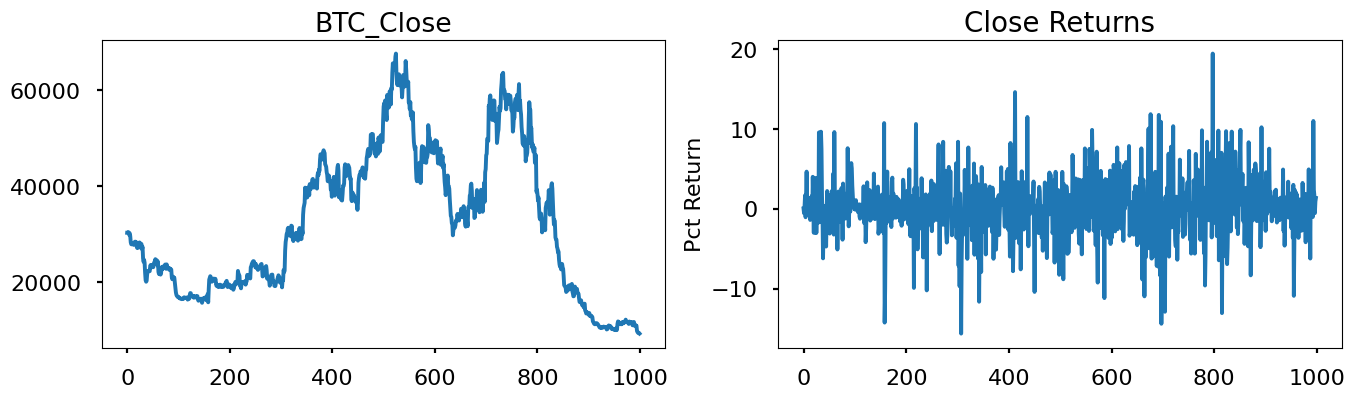

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df)
ax1.set_title("BTC_Close")

plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Close Returns', fontsize=20)

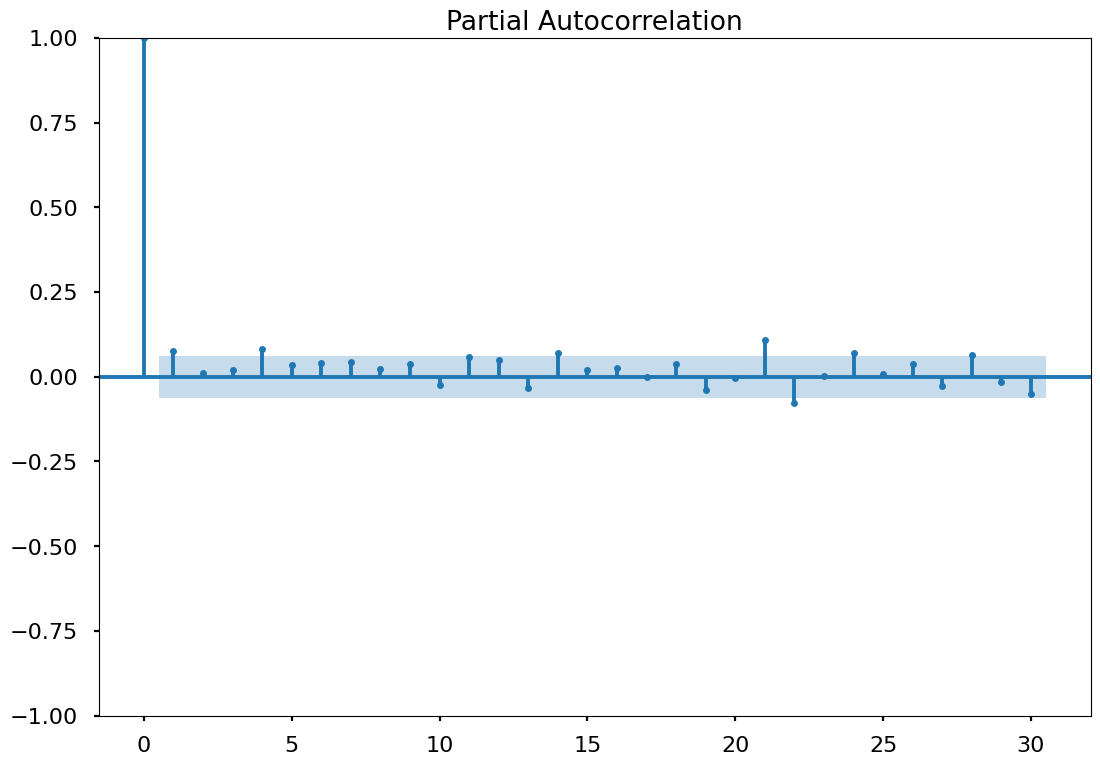

In [12]:
plot_pacf(returns**2)
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.dropna())
print(f"ADF Statistic :{result[0]}")
print(f"p-value :{result[1]}")

ADF Statistic :-1.820789884577885
p-value :0.37019002918195154


P>0.05 ==> The series is not stationary

In [18]:
import gc
q_range = 10
p_range = 10
best_order = None
best_value = float('inf')
best_model = None
for x in range(1,q_range):
    for y in range(1,p_range):
        gc.collect()
        model = arch_model(returns, mean='Constant', vol='GARCH', p = y, q = x)
        model_fit = model.fit()
        if best_value > model_fit.aic:
            best_model = model
            best_value = model_fit.aic
            best_order = (y, x)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 5663.126208407143
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3234.6546284986725
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4823.132800057057
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3006.934312450917
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2676.632765566792
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2676.615433316101
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2676.614152150756
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2676.6139356742333
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2676.6139312110636
Iteration:     10,   Func. Count:     63,   Neg. LLF: 2676.6139312122186
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2676.6139312110636
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 727939.46192

In [20]:
best_order

(1, 4)

In [21]:

model = arch_model(returns, p=1, q=4)

In [22]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 818599.19672305
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2759.286843016379
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2763.615818331792
Iteration:      4,   Func. Count:     37,   Neg. LLF: 2713.810586513911
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2728.532692325318
Iteration:      6,   Func. Count:     56,   Neg. LLF: 2696.5148290707975
Iteration:      7,   Func. Count:     65,   Neg. LLF: 2684.9185975619516
Iteration:      8,   Func. Count:     74,   Neg. LLF: 2677.936971440739
Iteration:      9,   Func. Count:     83,   Neg. LLF: 2670.224023410109
Iteration:     10,   Func. Count:     91,   Neg. LLF: 2670.34031247849
Iteration:     11,   Func. Count:    100,   Neg. LLF: 2670.1848908529646
Iteration:     12,   Func. Count:    108,   Neg. LLF: 2670.1627413402184
Iteration:     13,   Func. Count:    116,   Neg. LLF: 2670.160471301191
Iteration:     14,   Func. Count:    124,   Neg. LLF: 2670.1603

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              BTC_close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2670.16
Distribution:                  Normal   AIC:                           5354.32
Method:            Maximum Likelihood   BIC:                           5388.67
                                        No. Observations:                  999
Date:                Mon, Jun 19 2023   Df Residuals:                      998
Time:                        01:26:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1975      0.163      1.209      0.227 [ -0.123,  0.518]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0412      0.546      1.906  5.664e-02 [-2.944e-02,  2.112]
alpha[1]       0.1284  6.837e-02      1.878  6.044e-02 [-5.634e-03,  0.262]
beta[1]    1.4454e-15      0.738  1.959e-15      1.000    [ -1.446,  1.446]
beta[2]        0.0000      1.106      0.000      1.000    [ -2.169,  2.169]
beta[3]        0.5292      0.754      0.702      0.483    [ -0.948,  2.007]
beta[4]        0.2644      1.139      0.232      0.817    [ -1.969,  2.498]
===========================================================================

Covariance estimator: robust
"""

In [41]:
rolling_predictions = []
test_size = 730

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=4)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [42]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*2:])

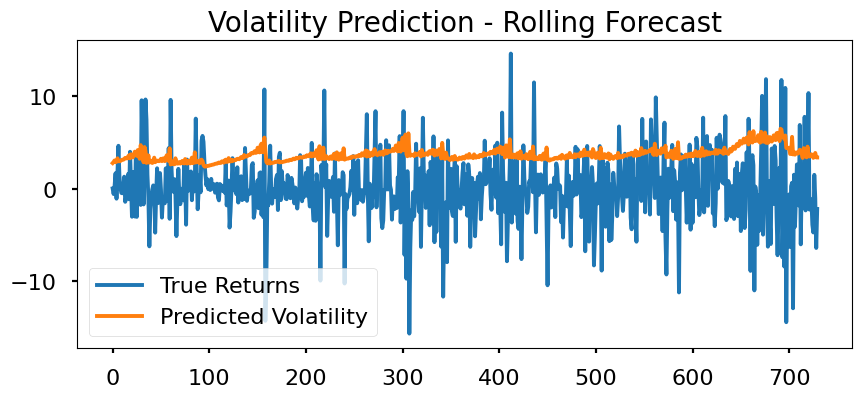

In [43]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*2:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)